# Data Import


In [1]:
# Importing necessary functions

import os
import random
import Augmentor
from PIL import Image
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import History

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
# Se

# Loading Images


In [2]:
normal_data_folder = '/Users/aditya/Desktop/My Computer/DDP/New/Data/Normal Xrays'
implant_data_folder = '/Users/aditya/Desktop/My Computer/DDP/New/Data/Implant Xrays'

# Get a list of all files in the data folder
normal_files = os.listdir(normal_data_folder)
implant_files = os.listdir(implant_data_folder)

normal_files = [file for file in normal_files if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]
implant_files = [file for file in implant_files if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

normal_image_list = []
for image_file in normal_files:
    image_path = os.path.join(normal_data_folder, image_file)
    img = Image.open(image_path)
    normal_image_list.append(img)

implant_image_list = []
for image_file in implant_files:
    image_path = os.path.join(implant_data_folder, image_file)
    img = Image.open(image_path)
    implant_image_list.append(img)

    


# Data Augmentation



In [3]:
p_normal = Augmentor.Pipeline('/Users/aditya/Desktop/My Computer/DDP/New/Data/Normal Xrays')
p_normal.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
p_normal.zoom(probability=0.3, min_factor=1.1, max_factor=1.6)

p_normal.sample(100)

Initialised with 15 image(s) found.
Output directory set to /Users/aditya/Desktop/My Computer/DDP/New/Data/Normal Xrays/output.

Processing <PIL.Image.Image image mode=L size=1208x1502 at 0x28A170E90>: 100%|██████████| 100/100 [00:07<00:00, 13.10 Samples/s]               


In [4]:
p_implant = Augmentor.Pipeline('/Users/aditya/Desktop/My Computer/DDP/New/Data/Implant Xrays')
p_implant.rotate(probability=0.7, max_left_rotation=20, max_right_rotation=20)
p_implant.zoom(probability=0.5, min_factor=0.8, max_factor=1.6)

p_implant.sample(400)

Initialised with 25 image(s) found.
Output directory set to /Users/aditya/Desktop/My Computer/DDP/New/Data/Implant Xrays/output.

Processing <PIL.PngImagePlugin.PngImageFile image mode=L size=1223x1829 at 0x28A4C4490>: 100%|██████████| 400/400 [00:23<00:00, 16.87 Samples/s]


# Model


In [2]:
implant_xrays_dir = '/Users/aditya/Desktop/My Computer/DDP/New/Data/Augmented/Implant Xrays'
normal_xrays_dir = '/Users/aditya/Desktop/My Computer/DDP/New/Data/Augmented/Normal Xrays'

# Define image dimensions and other parameters
img_width, img_height = 150, 150  
batch_size = 32
epochs = 50

# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [19]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Adjust the validation split as needed
)

train_generator = train_datagen.flow_from_directory(
    '/Users/aditya/Desktop/My Computer/DDP/New/Data/Augmented',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'  # Use 'validation' for validation generator
)

validation_generator = train_datagen.flow_from_directory(
    '/Users/aditya/Desktop/My Computer/DDP/New/Data/Augmented',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)


Found 400 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [20]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs,
)

Epoch 1/50
12/12 [==============================] - 11s 962ms/step - loss: 0.6801 - accuracy: 0.7065 - val_loss: 0.4365 - val_accuracy: 0.8125
Epoch 2/50
12/12 [==============================] - 10s 868ms/step - loss: 0.5180 - accuracy: 0.8043 - val_loss: 0.5038 - val_accuracy: 0.7917
Epoch 3/50
12/12 [==============================] - 10s 844ms/step - loss: 0.4638 - accuracy: 0.8179 - val_loss: 0.4906 - val_accuracy: 0.7917
Epoch 4/50
12/12 [==============================] - 10s 844ms/step - loss: 0.3540 - accuracy: 0.8424 - val_loss: 0.3835 - val_accuracy: 0.8021
Epoch 5/50
12/12 [==============================] - 10s 844ms/step - loss: 0.2215 - accuracy: 0.9185 - val_loss: 0.2147 - val_accuracy: 0.8438
Epoch 6/50
12/12 [==============================] - 10s 840ms/step - loss: 0.1742 - accuracy: 0.9348 - val_loss: 0.1164 - val_accuracy: 0.9896
Epoch 7/50
12/12 [==============================] - 10s 892ms/step - loss: 0.0968 - accuracy: 0.9674 - val_loss: 0.0869 - val_accuracy: 0.9688

In [55]:

model.save('xray_classifier_model.keras')

In [21]:
train_loss = (history.history['loss'])
val_loss = (history.history['val_loss'])

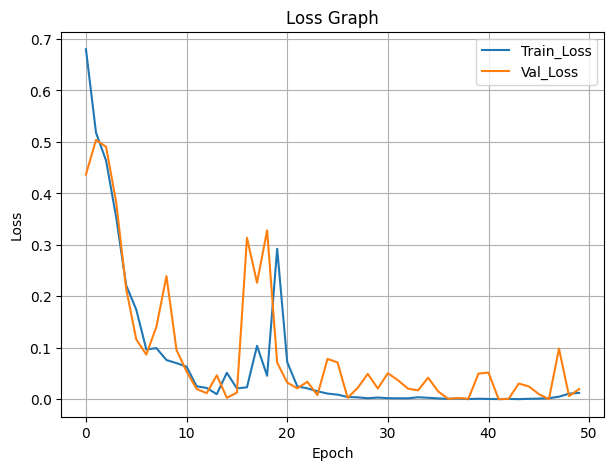

In [28]:
plt.figure(figsize=(7,5))
plt.title("Loss Graph")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.plot(train_loss)
plt.plot(val_loss)

plt.legend(['Train_Loss','Val_Loss'])

In [23]:
train_acc = (history.history['accuracy'])
val_acc = (history.history['val_accuracy'])

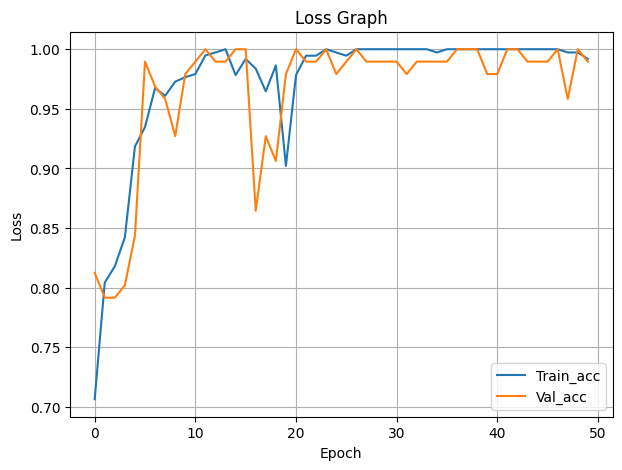

In [27]:
plt.figure(figsize=(7,5))
plt.title("Accuracy Graph")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.plot(train_acc)
plt.plot(val_acc)

plt.legend(['Train_acc','Val_acc'])

# Testing the Model

In [9]:
model = load_model('xray_classifier_model.h5')  # Use the actual path to your saved model
img_arr = []

for i in range(9):
    image_path = '/Users/aditya/Desktop/My Computer/DDP/New/Data/Implant Xrays/' + str(i) +'.png'  
    img = image.load_img(image_path, target_size=(150, 150))  
    img_arr.append(img)

for i in range(9):
    image_path = '/Users/aditya/Desktop/My Computer/DDP/New/Data/Normal Xrays/' + str(i) +'.png'  
    img = image.load_img(image_path, target_size=(150, 150))  
    img_arr.append(img)


img_arr = random.sample(img_arr, len(img_arr))

In [ ]:
for img in img_arr:
    
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the pixel values
    
    plt.imshow(img)
    prediction = model.predict(img_array)

    if prediction[0][0] >= 0.5:
        plt.title("Predicted: Normal X-ray")
    else:
        plt.title("Predicted: Implant X-ray")
    
    plt.show() 
    

1/1 [==============================] - 0s 18ms/step
[[2.7776932e-07]]
Predicted: Implant X-ray


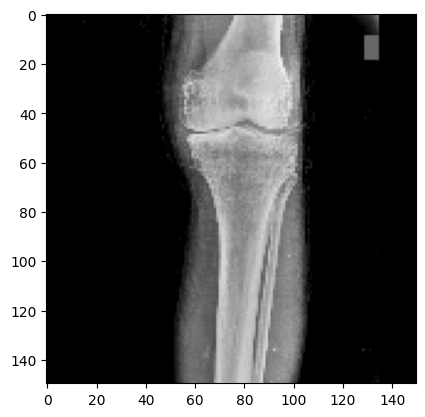

In [14]:
image_path = '/Users/aditya/Desktop/My Computer/DDP/New/knee_dataset3/Osteoporosis Knee X-ray/normal/N2.JPEG'  # Replace with the actual path to your image
# image_path = '/Users/aditya/Desktop/My Computer/DDP/New/knee_dataset2/MedicalExpert-I/0Normal/NormalG0 (145).png'

# Load and preprocess the image
img = image.load_img(image_path, target_size=(150, 150))  # Adjust target_size as needed
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize the pixel values

# Make predictions
plt.imshow(img)
prediction = model.predict(img_array)
print(prediction)
# The model outputs a probability. If the probability is close to 0, it's likely a normal X-ray;
# if it's close to 1, it's likely an implant X-ray.
if prediction[0, 0] >= 0.5:
    print("Predicted: Normal X-ray")
else:
    print("Predicted: Implant X-ray")

# New Dataset Training


In [29]:
implant_xrays_dir = '/Users/aditya/Desktop/My Computer/DDP/New/Data/Augmented/Implant Xrays'
normal_xrays_dir = '/Users/aditya/Desktop/My Computer/DDP/New/Data/Augmented/Normal Xrays copy'

# Define image dimensions and other parameters
img_width, img_height = 150, 150  
batch_size = 32
epochs = 50

# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [30]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Adjust the validation split as needed
)

train_generator = train_datagen.flow_from_directory(
    '/Users/aditya/Desktop/My Computer/DDP/New/Data/Augmented',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'  # Use 'validation' for validation generator
)

validation_generator = train_datagen.flow_from_directory(
    '/Users/aditya/Desktop/My Computer/DDP/New/Data/Augmented',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)


Found 400 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


# Heat Map

